### Case Study on Correlation and Regression 
##### A textile company regularly spent money on five advertising companies for their ads.

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv("Add_sales_data_2018.csv")

In [3]:
df1.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
df1.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
Date                    205 non-null object
Add1(in Thousands)      205 non-null float64
Add2(in Thousands)      205 non-null float64
Add3(in Thousands)      205 non-null float64
Add4(in Thousands)      205 non-null float64
Add5(in Thousands)      205 non-null float64
Profit(in Thousands)    205 non-null float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


#### Checking for null values

In [6]:
df1.isnull().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

<b><h3>1.  Check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.</h3></b> 

#### Creating heatmap for corrrelation matrix


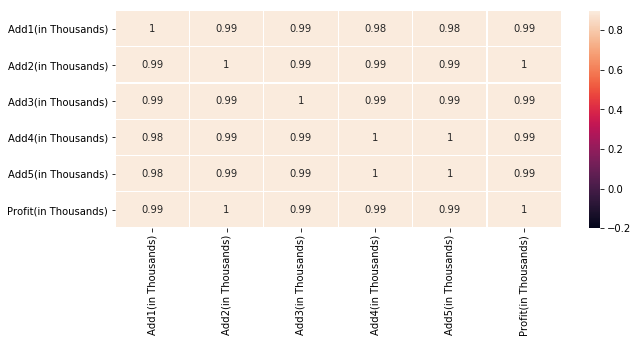

In [7]:
## displaying correlation using heatmap
cm=df1.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(cm,vmin=-.2,vmax=0.9,annot=True,linewidth=0.2)

<b><i>As the above figure shows, there is a <u>HIGH POSITIVE CORRELATION</u> between each independent variables and independent to dependent variables.</i></b>

<b>Also Add4 and Add5 are perfectly correlated.</b><br>
<b>Also Add2 and Profit are perfectly correlated.</b>

In [8]:
## displaying all columns
df1.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [9]:
## 'Profit(in Thousands)' is the dependent variable. So it is assigned to y.
y=df1['Profit(in Thousands)']
## Remove 'Profit(in Thousands)' and 'Date' from dataset and assign the remaining dataset as independent variable.
## 'Date' is an object datatype.
x=df1.drop(['Profit(in Thousands)','Date'],axis=1)

#### 2. Build a regression model to predict the profit from the given data and comment your findings on it. 

In [10]:
## For spliting
from sklearn.model_selection import train_test_split

In [11]:
## Assigning data for these variables
## Dataset is divided into 25% for testing and 75% for training
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [12]:
from sklearn import linear_model

In [13]:
## Creating an instance of LinearRegression
lr=linear_model.LinearRegression()

In [14]:
## Here we created the model using x_train and y_train
## After running this the model is ready for prediction.
model=lr.fit(x_train,y_train)

In [15]:
## Model is used for prediciton and the predicited output is stored in prediciton
prediction=model.predict(x_test)

In [16]:
## Checking the original y_test values
y_test.head(10)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
Name: Profit(in Thousands), dtype: float64

In [17]:
## Equalent predicted values
prediction[0:11]

array([4152.066, 4446.441, 5131.898, 4907.56 , 5004.282, 4623.793,
       5384.175, 5328.025, 5175.051, 5956.323, 5780.799])

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
## The difference between the predicted and actual values are shown i.e in their Mean Squared Error form.
float(mean_squared_error(y_test,prediction))

1.0339757656912846e-24

In [20]:
## when rounded.
print("MSE is:",round(float(mean_squared_error(y_test,prediction)),5))

MSE is: 0.0


In [21]:
(sum(prediction)/sum(y_test))*100

99.99999999999999

<b>This model predicted the values with 99.99% accuracy.<b><br>
<b>Also the MSE value is very low.</b>

#### 3.  Predict the profit generated by the company, if they wish to spend the following amount for advertisement.  
<b>Add1(in Thousands)= 290</b><br>
<b>Add2(in Thousands)= 312</b><br> 
<b>Add3(in Thousands)= 309</b><br> 
<b>Add4(in Thousands)= 298</b><br> 
<b>Add5(in Thousands)= 320</b><br>    

In [22]:
## Assigning the above values as a row.
row1=[[290,312,309,298,320]]
## Using the above created model , predicted the values and stored in a variable
custom_predict=model.predict(row1)

In [23]:
## The predicted profit is:
custom_predict

array([5820.06])